![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 5: Support Vector Machines (SVMs)

# Exercise SVM:

In this exercise, we will introduce SVM. This exercise is divided in two parts:
1. We will create a SVM classifier using 2D sythetic data that we will generate. We will fit a SVM to these 2D synthetic data. , We will extract/display the parameters of the SVM model that we have fitted to these dat. In particular, we are interested in the decision boundary. We will see that this decision boundary is a straight line in this case. Remember, decision boundary == hyper plane == line in 2D. We will write the math equation of the decision boundary (y=b0+b1x).

2. Using the cancer data set, we will build an SVM classifier with 2 classes, malign and benign.



# Classification problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm               import *
from sklearn.datasets          import make_blobs
from sklearn.metrics           import *
from sklearn.preprocessing     import *
from sklearn.model_selection   import *
from sklearn.pipeline          import *

In [2]:
from plotnine import *
import warnings; warnings.simplefilter('ignore')

We have loaded several submodules of `sklearn`. To learn as you go: 

* The documentation of each method can be accessed by pressing the TAB button inside parenthesis, e.g. in `SVC()`.
* `sklearn` has more detailed documentation online, see e.g. <http://scikit-learn.org/stable/modules/svm.html>. 



## Maximum margin separating hyperplane. Toy example

We start with a simple example: consider 300 points of two classes in 2D, which are linearly separable: 

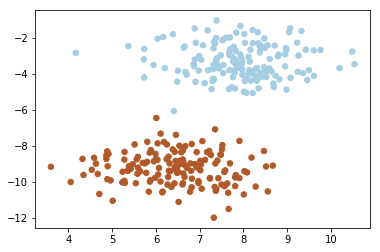

In [3]:
X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

### <font color='blue'> Question 1:  In 2D, a hyperplane is 1D (i.e. a line). Compute the line that separates the two classes and has a maximum margin: </font>
<p>   
<font color='blue'> Steps: </font>
<p>
<font color='blue'> 1. Divide the data into training and test sets. </font>
<p>
<font color='blue'> 2. Create an "SVC" object named "mySVM" with a linear kernel. </font>
<p>
<font color='blue'> 3. Call its "fit" method on the predictors "X" and "y". </font>

<p><font color='green'>Tip: to display inline help, move your cursor to the end of the next code chunk and press TAB:</font>

<font color='blue'> START CODE HERE </font>

In this case, the data is in the same scale. 
Nevertheless, because it is very important to have the data in the same in scale when using SVMs, let's scale the data, so it becomes second-nature for us. 
We use a pipeline in this case.

In [4]:
# Write Python code here
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 2)
(60, 2)
(240,)
(60,)


In [ ]:
mySVM = SVC(kernel=linear)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

steps = [('Transform', Scaler), ('SVMmodel', mySVM)]

In [ ]:
mySVM_pipeline.fit()

<font color='blue'> END CODE HERE </font>


### <font color='blue'> Question 2:  What can you do with the `mySVM` object? Move your cursor the end and hit TAB: </font>

In [ ]:
mySVM.

<b> Write the answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

## Display decision boundary - hyperplane in the training set

We are interested in the decision function here; let's plot it for the training data to see how well our model is able to separeate the two classes in the training set.

As we used a pipeline to scale our data, we need to access that module of the pipeline to retrieve the scaled version of the training set:

Note: it is not usually necessary to access a middel step of the pipeline. In this case, we are interested in displaying the data after being scaled (standardize); thus, we need to access the module that we called "Transform".

In [ ]:
#X_train_scaled =...

In [8]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mySVM.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

NameError: name 'X_train_scaled' is not defined

Note that the data has been standarized (scaled).

## Display decision boundary - hyperplane in the test set

We are interested in the decision function here, let's plot it for the test data to see how well our model is able to separeate the two classes in the test set.

As we used a pipeline to scale our data, we need to access that module of the pipeline to retrieve the scaled version of the test set:

In [ ]:
#X_test_scaled...

In [ ]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mySVM.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

### <font color='blue'> Question 3:  How good is this SVM classifier? Test it in the training and test sets </font>

In this easy example, we don't need to tune much, because with the default values we already achieve perfect separation:

<font color='blue'> START CODE HERE </font>

In [ ]:
# Write Python code here


<font color='blue'> END CODE HERE </font>


For less straightforward examples, the penalty parameter `C` needs to be tuned, as well as the kernel parameters (if kernel is not `linear`).

> Try smaller and larger values for `C`, and interpret the results!



We can read off the intercept, coefficients and support vectors as follows: 

In [ ]:
(beta, alpha, V) = (mySVM.intercept_, mySVM.dual_coef_, mySVM.support_vectors_)
(beta, alpha, V)

If you have used a Pipeline above, there is an alternative to write this code. Check the solution notebook.

## Applied to breast cancer data

In [9]:
# get data
cancer = pd.read_csv('data/breast-cancer-wisconsin-data/data.csv', sep=',')

# In case we want to shuffle rows, you can proceed as follows:
#cancer = cancer.reindex(np.random.permutation(cancer.index))
#cancer.info()

In [22]:
y = (cancer.diagnosis == 'M')
print(f"""There are {sum(y)} malignant and {sum(1-y)} benign cases.""")
y = cancer.diagnosis
#print(y[:20])

There are 212 malignant and 357 benign cases.
0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
Name: diagnosis, dtype: object


### <font color='blue'> For questions 4 and 5: we are not using a Pipeline in these questions.

### <font color='blue'> Question 4: Use `StandardScaler()` from the submodule `preprocessing` to scale the training data.  It is very important to scale the data when we use SVMs.</font>

<font color='blue'> START CODE HERE </font>

In [12]:
# Write Python code here:
mySVM = SVC(kernel='linear')

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

steps = [('Transform', Scaler), ('SVMmodel', mySVM)]

In [23]:
X = cancer.drop(['diagnosis', 'id'], axis = 1)

In [26]:
X[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)

<font color='blue'> END CODE HERE </font>

### <font color='blue'> Question 5: </font>
<p>
1. <font color='blue'>Do not use a Pipeline this time. Fit a support vector classifier `SVC()` to the now scaled training data. Make classifier compute probabilities. 
<p>
2. <font color='blue'>Transform the test data with the same scaling transformation as the train data.
<p>
3. <font color='blue'>Compute
    * the predictions `y_pred` on the test data, according to the decision function
    * the class probabilities `y_score` on the test data.
<p>
4. <font color='blue'>Calculate
    * the confusion matrix for your predictions
    * plot the ROC curve and compute the AUC

<font color='blue'> START CODE HERE </font>

In [ ]:
# Write Python code here:



<font color='blue'> END CODE HERE </font>

## Tuning the hyperparameters: grid search

### <font color='blue'> Question 6: </font>
1. <font color='blue'>Using `Pipeline()`, create an estimator which automatically transforms the input data and fits a SVC.
2. <font color='blue'>Train it on the training data.
3. <font color='blue'>Evaluate it on the test data.

<font color='blue'> START CODE HERE </font>

In [ ]:
# Write Python code here:

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

steps = [('Transform', Scaler), ('SVMmodel', mySVM)]

<font color='blue'> END CODE HERE </font>

### <font color='blue'> Question 7: </font>

<font color='blue'> Next we want to systematically try different parameter settings for our estimator. Use `GridSearchCV()` to perform 5-fold cross-validation for the following parameters: 
* Try the kernels `linear`, `rbf` and `poly`
* Try values 1, 10, 100, 1000 for `C`
* Try values of `gamma` which are smaller or larger than the default

Pick a useful score to be maximised from [here](http://scikit-learn.org/stable/modules/model_evaluation.html).

<font color='blue'> START CODE HERE </font>

In [ ]:
# Write Python code here:



<font color='blue'> END CODE HERE </font>

## Tuning the hyperparameters: random search

Usually, a better search strategy is **random search**, which 
1. specifies a distribution for each parameter
2. repeatedly draws a set of parameters and evaluates this draw using CV
3. stops after a previously decided number of iterations. 

### <font color='blue'> Question 8: </font>
<font color='blue'> Use `RandomizedSearchCV` with suitable exponential distributions (`scipy.stats.expon()`) for `C` and `gamma`. 
Choose a kernel at random. </font>

Tip: Read
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://scikit-learn.org/stable/modules/grid_search.html (See example 5.2.2 and copy it).
3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
4. https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/


<font color='blue'> START CODE HERE </font>

In [ ]:
from scipy.stats import expon

# Write Python code here:

# Example: parameter_distribution = {'svc__C': expon(scale=10), 'svc__gamma': expon(scale=1/30),
#'svc__kernel': ['rbf'], 'svc__class_weight':['balanced', None]}
# 

In [ ]:
# Write Python code here:


<font color='blue'> END CODE HERE </font>